In [28]:
# Libraries
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sklearn

In [15]:
# Audio file to process
audio_path = './guayaquil.mp3'
x , sr = librosa.load(audio_path) #decodes it into a 1-dimensional array which is a time series & sr is sampling rate
ipd.Audio(audio_path)

/Users/johan56/miniconda3/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


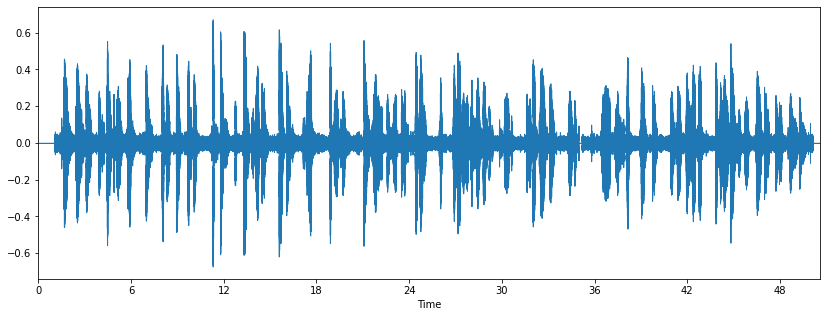

In [18]:
# Waveplot let us know loudness(amplitude)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

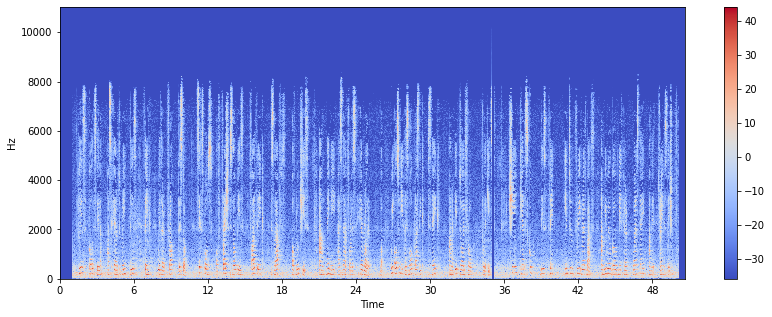

In [20]:
# Spectogram let us know frequency
X = librosa.stft(x) #converts data into short term Fourier transform
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Knowledge
Waveplots let us know the loudness of the audio at a given time.

Spectogram shows different frequencies playing at a particular time along with it’s amplitude.

Amplitude and frequency are important parameters of the sound and are unique for each audio

STFT convert signal such that we can know the amplitude of given frequency at a given time.

Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal

# Feature extraction

### Zero Crossing Rate

Rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back.
Has higher values for highly percussive sounds like those in metal and rock.

4


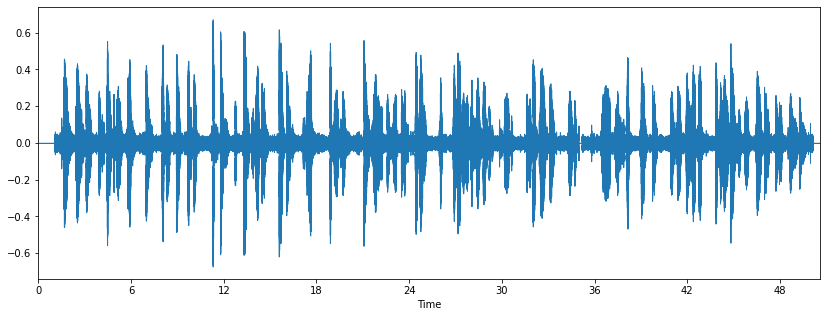

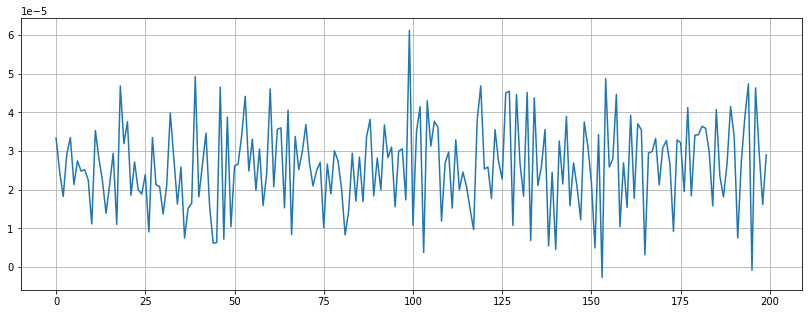

In [25]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9200
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

### Spectral centroid
Indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound

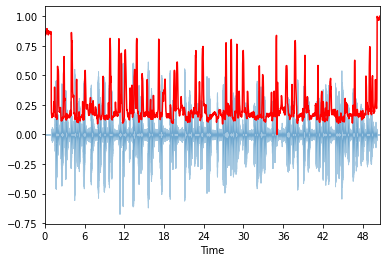

In [27]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0] #calculate the spectral centroid for each frame
spectral_centroids.shape# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

### Spectral Rolloff

Frequency below which a specified percentage of the total spectral energy.


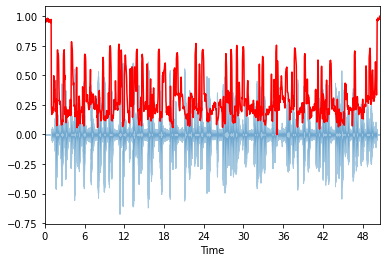

In [29]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

### Mel-Frequency Cepstral Coefficients

The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.

Printing the shape of mfccs get how many mfccs are calculated on how many frames.
The first value represents the number of mfccs calculated and another value represents a number of frames available

(20, 2179)


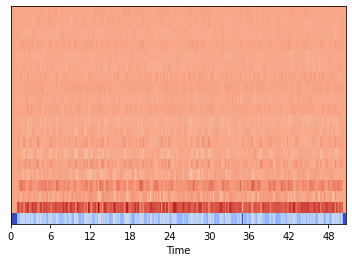

In [30]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [31]:
# Next blog link : https://medium.com/@sdoshi579/classification-of-music-into-different-genres-using-keras-82ab5339efe0